# 기초 미분

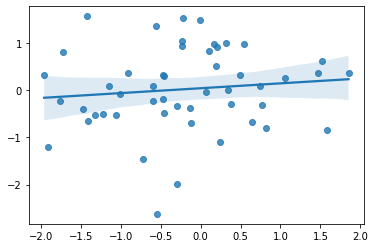

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 랜덤하게 평균0, 표준편차1의 가우시안 표준정규분포 난수 x, y를 50개씩 뽑기
np.random.seed(42)  # 동일한 결과를 보기 위해 시드를 고정. https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html
x = np.random.randn(50)
y = np.random.randn(50)

# 산점도를 통해 x,y를 시각화.
sns.regplot(x, y)
plt.show()

In [3]:
# 예시 1 : Numerical Method

# f(x) = 5
def f(x):
    return 5

def numerical_derivative(fx, x):
    delta_x = 1e-5

    return (fx(x + delta_x) - fx(x)) / delta_x

print(numerical_derivative(f, 1))

# 예시 2 : Scipy의 derivative 활용
from scipy.misc import derivative

# 두 방법의 결과값 비교
derivative(f,1, dx=1e-6) == numerical_derivative(f, 1)

0.0


<ipython-input-3-bdfe69a83b7f>:18: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative(f,1, dx=1e-6) == numerical_derivative(f, 1)


True

In [4]:
# 같은 결과를 numerical method를 활용해서 계산
def f(x):
    return 3*(x**4) + 10

def numerical_derivative(fx, x):
    delta_x = 1e-5

    return (fx(x + delta_x) - fx(x)) / delta_x

print(numerical_derivative(f, 2))

# 예시 2 : Scipy의 derivative 활용
from scipy.misc import derivative

# 두 방법의 결과값 비교
print(derivative(f,2, dx=1e-5))
derivative(f,2, dx=1e-5) == numerical_derivative(f, 2)  #delta X의 값은 같지만 Rounding 에러로 인해 두 결과가 미묘하게 다른 것을 확인가능.

96.0007200028201
96.0000000031158


<ipython-input-4-f45da4f1f207>:16: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  print(derivative(f,2, dx=1e-5))
<ipython-input-4-f45da4f1f207>:17: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative(f,2, dx=1e-5) == numerical_derivative(f, 2)  #delta X의 값은 같지만 Rounding 에러로 인해 두 결과가 미묘하게 다른 것을 확인가능.


False

# 경사하강법

In [5]:
def gradient_descent(X, y, lr = 0.05, epoch = 10):
    
    a, b = 0.33, 0.48 # 임의 선택한 파라미터 a, b
    N = len(X) # 샘플 갯수
    
    for _ in range(epoch):            
        f = y - (a*X + b)
    
        # a와 b를 업데이트
        a -= lr * (-2 * X.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)        
        
    print('a: '+str(a))
    print('b: '+str(b))

In [6]:
# y = 3 x + 5
X = np.array([1, 2, 3, 4, 5])
y = np.array([8, 11, 14, 17, 20])

In [7]:
gradient_descent(X,y)  # 10번만 돌렸을 때

a: 3.8200706153280004
b: 2.039284272128


In [8]:
gradient_descent(X, y, epoch = 100)  # 100번 반복

a: 3.176787975497293
b: 4.36173931393391


In [9]:

gradient_descent(X, y, epoch = 1000)  # 1000번 반복

a: 3.000000038323629
b: 4.999999861639539


## 점점 a=3, b=5 로 수렴하는 것을 확인 가능

# Exercise

## 1. df_iris의 shape의 첫번째 값을 두번째 값으로 나눈 값을 구하라

In [10]:
import seaborn as sns
import numpy as np
np.random.seed(42)

# 이곳에 답안을 작성합니다.
df_iris = sns.load_dataset('iris')
res1 = df_iris.shape[0]/df_iris.shape[1]
res1

30.0

## 2. df_iris에서 sepal_length만 남기고 sepal_length 칼럼의 이름은 x로 변경하라

In [11]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
df_iris = df_iris.drop(['sepal_width', 'petal_length', 'petal_width', 'species'], axis = 1)
df_iris.rename(columns={'sepal_length':'x'}, inplace=True)
df_iris

,x
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


## 3. 기초 미분

$f(x) = 4x^5 + 9x^3 + ex^2 - 7$

In [13]:
def num_one(x):

  return 20*(x**4) + 27*(x**2) + 2*np.exp(1)*x 

In [14]:
num_one(1)

52.43656365691809

In [15]:
df_iris['derivative_one'] = df_iris['x'].apply(num_one)
df_iris

,x,derivative_one
0,5.1,14260.398475
1,4.9,12204.511162
2,4.7,10381.343849
3,4.6,9551.240193
4,5.0,13202.182818
...,...,...
145,6.7,41550.696977
146,6.3,32611.802351
147,6.5,36877.337664
148,6.2,30624.258695


In [16]:
res2 = round(df_iris['derivative_one'].sum(), 3)
res2

4077643.108

In [18]:
from scipy.misc import derivative

In [19]:
def f(x):
  
    return 4*(x**5) + 9*(x**3) + (np.exp(1)*(x**2)) - 7

df_iris['derivative_two'] = derivative(f, df_iris['x'], dx= 1e-7)
df_iris

<ipython-input-19-b76be65dd3d0>:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  df_iris['derivative_two'] = derivative(f, df_iris['x'], dx= 1e-7)


,x,derivative_one,derivative_two
0,5.1,14260.398475,14260.398502
1,4.9,12204.511162,12204.511186
2,4.7,10381.343849,10381.343873
3,4.6,9551.240193,9551.240219
4,5.0,13202.182818,13202.182863
...,...,...,...
145,6.7,41550.696977,41550.697097
146,6.3,32611.802351,32611.802490
147,6.5,36877.337664,36877.337734
148,6.2,30624.258695,30624.258798


In [20]:
res3 = round(df_iris['derivative_two'].sum(), 3)
res3

4077643.121

## 4. 미분 연습

 $f(x) = e^x$ 

In [21]:
def e_prime(x):   # e^x
  
  dx = 1e-5
  return (np.exp(x+dx)-np.exp(x)) / dx

In [22]:
e_prime(5)

148.4139011665775

$f(x) = lnx$

In [23]:
def ln_prime(x):    # 1/x
    dx = 1e-5
    return (np.log(x+dx) - np.log(x)) / dx  # 이 곳에 답안을 작성하세요

In [24]:
ln_prime(5)

0.19999980001017545

$f(x) = Sin(2x)$

In [25]:
def sine_prime(x):    # 2cos(2x)
    dx = 1e-5
    return (np.sin(2*x + dx) - np.sin(2*x))*2 / dx

In [26]:
sine_prime(5)

-1.678137617866504

$f(x) = (2x^2 + 8x)^2$

In [27]:
def f_prime(x):
    return (2*(2*(x**2)+8*x)) * (4*x+8)

In [28]:
f_prime(5)

5040

$\varepsilon(p_1, p_2) = (e \cdot p_1 - p_2)^2 + {{k_2} \over { 2 }} \cdot p_2 $ 

$k_2 = 100$

- 단 최적의 $p_1$은 $p_2$가 $3$일때, 최적의 $p_2$는 $p_1$이 $10$일때를 기준으로 함

In [30]:
p1 = 3 / (np.exp(1))
p2 = 10*(np.exp(1)) - 25

$\sigma(x) = {{1} \over {1 + e^-x}}$. 

In [31]:
def sig_prime(x):

  return (1/(1+np.exp(-x))) * (1 - 1/(1+np.exp(-x)))

In [32]:
challenge = sig_prime(3)
challenge

0.045176659730912

$$\begin{align}\frac{d}{dx}sigmoid(x) & = \frac{d}{dx}\frac{1}{1+e^{-x}} \\& = \frac{d}{dx}(1+e^{-x})^{-1} \\& = -(1+e^{-x})^{-2}\cdot-e^{-x} \\& = \frac{e^{-x}}{(1+e^{-x})(1+e^{-x})} \\& = \frac{1}{(1+e^{-x})}\cdot\frac{1-1+e^{-x}}{(1+e^{-x})} \\& = \frac{1}{(1+e^{-})}\cdot[\frac{(1+e^{-x})}{(1+e^{-x})}-\frac{1}{(1+e^{-x})}] \\& = sigmoid(x)\cdot(1-sigmoid(x))\end{align}$$